### Basic usage

In [1]:
from pathlib import Path
import numpy as np
import importlib
import sea_ingest

sea_ingest = importlib.reload(sea_ingest)
from sea_ingest import seamf

seamf = importlib.reload(seamf)

data_path = Path("data")

# these return dictionaries of pandas dataframes (the default)
dfs1 = sea_ingest.read_seamf(data_path / "example_v1.sigmf", tz="America/New_York")
dfs2 = sea_ingest.read_seamf(data_path / "example_v2.sigmf", tz="America/New_York")

meta3 = sea_ingest.read_seamf_meta(data_path/'example_v3.sigmf', tz="America/New_York")
dfs3 = sea_ingest.read_seamf(data_path/'example_v3.sigmf', tz="America/New_York")
dfs4 = sea_ingest.read_seamf(data_path/'example_v4.sigmf') # timezone can be automatically identified from v4 onward
dfs5 = sea_ingest.read_seamf(data_path/'example_v5.sigmf')
dfs6 = sea_ingest.read_seamf(data_path/'example_v6.sigmf')

# # some alternative loading options
arrs6 = sea_ingest.read_seamf(data_path/'example_v6.sigmf', container_cls=np.ndarray, tz="America/Denver")
data6, meta6 = sea_ingest.read_seamf(data_path/'example_v6.sigmf', force_loader_cls=bytes, tz="America/Denver")

### Index name and order consistency check

In [29]:
for df_type in "pfp", "psd", "pvt", "apd":
    print(f"\n{df_type.upper()} Index Names:")
    if df_type != 'apd':
        versions = (1, 2, 3, 4, 5, 6,)
    else:
        versions = (4, 5, 6,)
    
    all_dfs = []
    for version in versions:
        all_dfs.append(locals()[f"dfs{version}"])
    
    for version in versions:
        name = f"v{version}:"
        dfs = locals()[f"dfs{version}"]
        print(name, dfs[df_type].index.names)
    


PFP Index Names:
v1: ['datetime', 'frequency', 'capture_statistic', 'detector']
v2: ['datetime', 'frequency', 'capture_statistic', 'detector']
v3: ['datetime', 'frequency', 'capture_statistic', 'detector']
v4: ['datetime', 'frequency', 'capture_statistic', 'detector']
v5: ['datetime', 'frequency', 'capture_statistic', 'detector']
v6: ['datetime', 'frequency', 'capture_statistic', 'detector']

PSD Index Names:
v1: ['datetime', 'frequency', 'capture_statistic']
v2: ['datetime', 'frequency', 'capture_statistic']
v3: ['datetime', 'frequency', 'capture_statistic']
v4: ['datetime', 'frequency', 'capture_statistic']
v5: ['datetime', 'frequency', 'capture_statistic']
v6: ['datetime', 'frequency', 'capture_statistic']

PVT Index Names:
v1: ['datetime', 'frequency', 'detector']
v2: ['datetime', 'frequency', 'detector']
v3: ['datetime', 'frequency', 'detector']
v4: ['datetime', 'frequency', 'detector']
v5: ['datetime', 'frequency', 'detector']
v6: ['datetime', 'frequency', 'detector']

APD Index

### Column consistency check
The first and last 3 column index names

In [31]:
for df_type in "pfp", "psd", "pvt", "apd":
    print(f"\n{df_type.upper()}:")

    if df_type != 'apd':
        versions = (1, 2, 3, 4, 5, 6,)
    else:
        versions = (4, 5, 6,)

    for version in versions:
        name = f"dfs{version}"
        dfs = locals()[name]
        print(name, dfs[df_type].columns[:3].tolist(), dfs[df_type].columns[-3:].tolist())



PFP:
dfs1 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]
dfs2 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]
dfs3 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]
dfs4 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]
dfs5 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]
dfs6 [0.0, 1.7857142857142855e-05, 3.571428571428571e-05] [0.00994642857142857, 0.009964285714285714, 0.009982142857142856]

PSD:
dfs1 [-4992000.0, -4976000.0, -4960000.0] [4960000.0, 4976000.0, 4992000.0]
dfs2 [-4992000.0, -4976000.0, -4960000.0] [4960000.0, 4976000.0, 4992000.0]
dfs3 [-4992000.0, -4976000.0, -4960000.0] [4960000.0, 4976000.0, 4992000.0]
dfs4 [-4992000.0

### Performance

In [32]:
for version in (1, 2, 3, 4, 5, 6,):
    if version < 4:
        tz = "America/New_York"
    else:
        # autodetect timezone in newer files
        tz = None

    filename = data_path / f"example_v{version}.sigmf"

    print(f"======= file version {version} =========")
    print("Metadata only:")
    %timeit sea_ingest.read_seamf_meta(filename, tz=tz)

    print("File read raw bytes:")
    %timeit sea_ingest.read_seamf(filename, force_loader_cls=None, tz=tz)

    print("File read + metadata scan + unpack numpy.ndarray:")
    %timeit sea_ingest.read_seamf(filename, container_cls=np.ndarray, tz=tz)

    print("File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:")
    %timeit sea_ingest.read_seamf(filename, tz=tz)
    print("\n")

======= file version 1 =========
Metadata only:
2.25 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
File read raw bytes:
17.7 ms ± 972 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
File read + metadata scan + unpack numpy.ndarray:
18.5 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
24.3 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


======= file version 2 =========
Metadata only:
1.51 ms ± 44.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
File read raw bytes:
16.3 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
File read + metadata scan + unpack numpy.ndarray:
18.9 ms ± 337 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
File read + metadata scan + unpack numpy.ndarray -> pd.DataFrame:
24.2 ms ± 172 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


======= file version 3 =========
Metadata only:
1.41 ms ±

In [37]:
seamf = importlib.reload(seamf)
%load_ext line_profiler

p = data_path/'example_v6.sigmf'
%lprun -f seamf.read_seamf sea_ingest.read_seamf(p)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


### Returned data structure

In [38]:
# channel metadata
dfs6["channel_metadata"]

,,iq_capture_duration_ms,overload,cal_gain_dB,cal_noise_figure_dB,cal_temperature_degC,sigan_reference_level_dBm,sigan_attenuation_dB,sigan_preamp_enable
datetime,frequency,,,,,,,,
2023-09-17 17:59:06.672000+00:00,3.545000e+09,4000,False,29.842,4.932,29.1,-25.0,0.0,True
2023-09-17 17:59:11.302000+00:00,3.555000e+09,4000,False,30.125,4.6,29.1,-25.0,0.0,True
2023-09-17 17:59:17.219000+00:00,3.565000e+09,4000,False,30.554,4.301,29.1,-25.0,0.0,True
2023-09-17 17:59:21.862000+00:00,3.575000e+09,4000,False,30.438,4.309,29.1,-25.0,0.0,True
2023-09-17 17:59:26.955000+00:00,3.585000e+09,4000,False,30.61,4.16,29.1,-25.0,0.0,True
2023-09-17 17:59:32.280000+00:00,3.595000e+09,4000,False,30.711,4.163,29.1,-25.0,0.0,True
2023-09-17 17:59:36.955000+00:00,3.605000e+09,4000,False,30.739,4.155,29.1,-25.0,0.0,True
2023-09-17 17:59:42.963000+00:00,3.615000e+09,4000,False,30.621,4.234,29.1,-25.0,0.0,True
2023-09-17 17:59:47.656000+00:00,3.625000e+09,4000,False,30.419,4.265,29.1,-25.0,0.0,True


In [39]:
# power spectral density has a "capture_statistic" index
dfs6['psd'].head(6).iloc[:,:6]

Baseband Frequency (Hz)                                          -4992000.0  \
datetime                         frequency    capture_statistic               
2023-09-17 17:59:06.672000+00:00 3.545000e+09 max                  -160.375   
                                              mean                 -170.875   
2023-09-17 17:59:11.302000+00:00 3.555000e+09 max                  -161.250   
                                              mean                 -171.125   
2023-09-17 17:59:17.219000+00:00 3.565000e+09 max                  -131.250   
                                              mean                 -149.750   

Baseband Frequency (Hz)                                          -4976000.0  \
datetime                         frequency    capture_statistic               
2023-09-17 17:59:06.672000+00:00 3.545000e+09 max                  -159.250   
                                              mean                 -169.500   
2023-09-17 17:59:11.302000+00:00 3.555000e+09 max                  -159.125   
                                              mean                 -169.750   
2023-09-17 17:59:17.219000+00:00 3.565000e+09 max                  -130.125   
                                              mean                 -148.375   

Baseband Frequency (Hz)                                          -4960000.0  \
datetime                         frequency    capture_statistic               
2023-09-17 17:59:06.672000+00:00 3.545000e+09 max                  -158.375   
                                              mean                 -169.125   
2023-09-17 17:59:11.302000+00:00 3.555000e+09 max                  -158.250   
                                              mean                 -169.375   
2023-09-17 17:59:17.219000+00:00 3.565000e+09 max                  -130.000   
                                              mean                 -148.125   

Baseband Frequency (Hz)                                          -4944000.0  \
datetime                         frequency    capture_statistic               
2023-09-17 17:59:06.672000+00:00 3.545000e+09 max                  -158.375   
                                              mean                 -169.125   
2023-09-17 17:59:11.302000+00:00 3.555000e+09 max                  -159.375   
                                              mean                 -169.375   
2023-09-17 17:59:17.219000+00:00 3.565000e+09 max                  -130.500   
                                              mean                 -148.375   

Baseband Frequency (Hz)                                          -4928000.0  \
datetime                         frequency    capture_statistic               
2023-09-17 17:59:06.672000+00:00 3.545000e+09 max                  -157.000   
                                              mean                 -169.125   
2023-09-17 17:59:11.302000+00:00 3.555000e+09 max                  -158.250   
                                              mean                 -169.375   
2023-09-17 17:59:17.219000+00:00 3.565000e+09 max                  -130.125   
                                              mean                 -148.625   

Baseband Frequency (Hz)                                          -4912000.0  
datetime                         frequency    capture_statistic              
2023-09-17 17:59:06.672000+00:00 3.545000e+09 max                  -156.875  
                                              mean                 -169.125  
2023-09-17 17:59:11.302000+00:00 3.555000e+09 max                  -157.875  
                                              mean                 -169.375  
2023-09-17 17:59:17.219000+00:00 3.565000e+09 max                  -130.625  
                                              mean                 -148.375

<Axes: xlabel='Baseband Frequency (Hz)', ylabel='PSD (dBm/Hz)'>

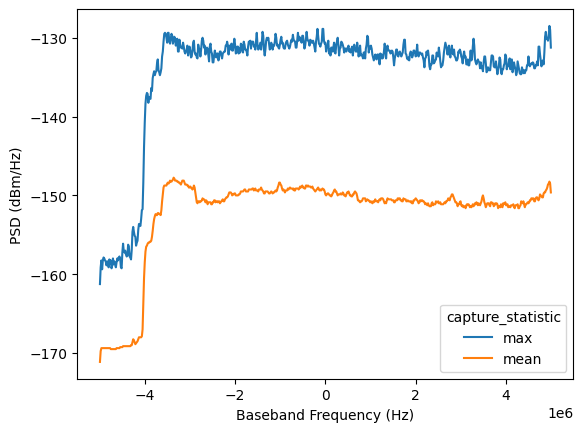

In [40]:
from matplotlib import pyplot as plt

(
    dfs6['psd']
    .droplevel('datetime')
    .loc(axis=0)[3.555e9]
    .T
    .plot(ylabel='PSD (dBm/Hz)')
)

In [41]:
dfs6['pfp'].head(12).iloc[:,:6]

Frame time elapsed (s)                                                    0.000000  \
datetime                         frequency    capture_statistic detector             
2023-09-17 17:59:06.672000+00:00 3.545000e+09 min               rms       -99.8125   
                                              max               rms       -98.6250   
                                              mean              rms       -99.1875   
                                              min               peak      -93.1875   
                                              max               peak      -88.6875   
                                              mean              peak      -91.0000   
2023-09-17 17:59:11.302000+00:00 3.555000e+09 min               rms      -100.0625   
                                              max               rms       -98.8750   
                                              mean              rms       -99.5000   
                                              min               peak      -93.2500   
                                              max               peak      -89.1250   
                                              mean              peak      -91.3125   

Frame time elapsed (s)                                                    0.000018  \
datetime                         frequency    capture_statistic detector             
2023-09-17 17:59:06.672000+00:00 3.545000e+09 min               rms       -99.8750   
                                              max               rms       -98.6875   
                                              mean              rms       -99.1875   
                                              min               peak      -92.8125   
                                              max               peak      -88.0625   
                                              mean              peak      -91.0000   
2023-09-17 17:59:11.302000+00:00 3.555000e+09 min               rms      -100.1250   
                                              max               rms       -99.0000   
                                              mean              rms       -99.5000   
                                              min               peak      -92.7500   
                                              max               peak      -87.6875   
                                              mean              peak      -91.2500   

Frame time elapsed (s)                                                    0.000036  \
datetime                         frequency    capture_statistic detector             
2023-09-17 17:59:06.672000+00:00 3.545000e+09 min               rms       -99.8125   
                                              max               rms       -98.7500   
                                              mean              rms       -99.2500   
                                              min               peak      -92.8125   
                                              max               peak      -87.4375   
                                              mean              peak      -91.0000   
2023-09-17 17:59:11.302000+00:00 3.555000e+09 min               rms      -100.0625   
                                              max               rms       -98.9375   
                                              mean              rms       -99.5000   
                                              min               peak      -93.4375   
                                              max               peak      -88.3125   
                                              mean              peak      -91.4375   

Frame time elapsed (s)                                                    0.000054  \
datetime                         frequency    capture_statistic detector             
2023-09-17 17:59:06.672000+00:00 3.545000e+09 min               rms       -99.9375   
                                              max               rms       -98.7500   
                                         

<Axes: xlabel='Frame time elapsed (s)', ylabel='PFP (dBm/10MHz)'>

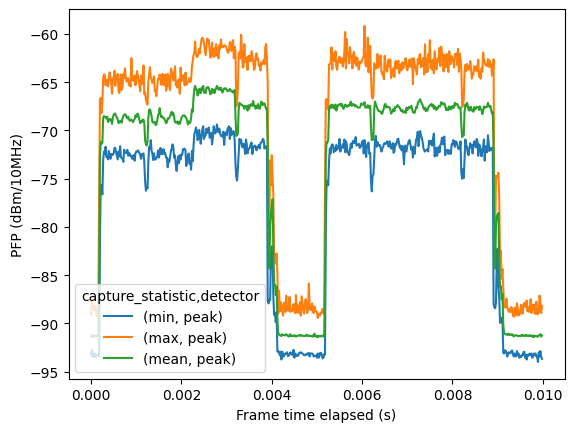

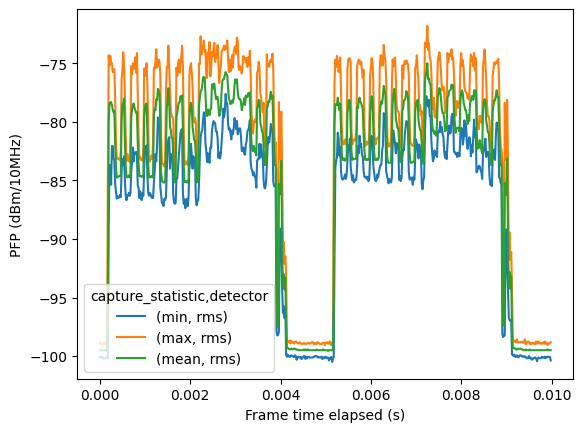

In [42]:
fig, ax = plt.subplots()
(
    dfs6['pfp']
    .loc(axis=0)[:,3.555e9,:,'peak']
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PFP (dBm/10MHz)')
)

fig, ax = plt.subplots()
(
    dfs6['pfp']
    .loc(axis=0)[:,3.555e9,:,'rms']
    .droplevel(['datetime','frequency'])
    .T
    .plot(ax=ax, ylabel='PFP (dBm/10MHz)')
)

In [43]:
dfs6['apd'].head(12).iloc[:,:8]

,Channel Power (dBm/10MHz),-180,-179,-178,-177,-176,-175,-174,-173
datetime,frequency,,,,,,,,
2023-09-17 17:59:06.672000+00:00,3.545000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-09-17 17:59:11.302000+00:00,3.555000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-09-17 17:59:17.219000+00:00,3.565000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-09-17 17:59:21.862000+00:00,3.575000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-09-17 17:59:26.955000+00:00,3.585000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-09-17 17:59:32.280000+00:00,3.595000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-09-17 17:59:36.955000+00:00,3.605000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-09-17 17:59:42.963000+00:00,3.615000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2023-09-17 17:59:47.656000+00:00,3.625000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


1.0   -180
1.0   -179
1.0   -178
1.0   -177
1.0   -176
      ... 
NaN    -34
NaN    -33
NaN    -32
NaN    -31
NaN    -30
Length: 151, dtype: int64

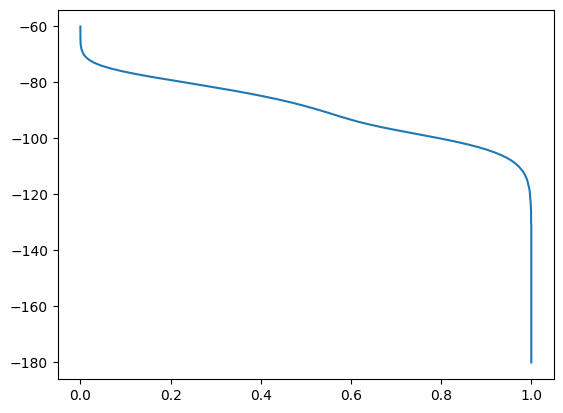

In [44]:
import pandas as pd

fig, ax = plt.subplots()

apd = dfs6['apd'].loc(axis=0)[:,3.555e9]

# Crude APD plot: does not apply Rayleigh axis scaling
# This just shows that the index/data are reversed from what would be expected

# one solution is to create a new series, swapping the axis for the channel data:
apd = pd.Series(apd.columns.values, index=apd.values[0])
apd.plot()
apd